<a href="https://colab.research.google.com/github/bhagirathbhard/Mental-Health-Analysis/blob/main/mental_health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

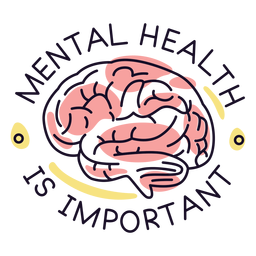

## **<span style="color:#023e8a;font-size:200%">Mental Health Indicators</span>**
## **<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">By: Bhagirath Bhardwaj, Vibhas Goel, Lakshmi Sindhura Uppalapati, and Valentina Torres</span>**

# **<span id="Project-Overview" style="color:#023e8a;">Project Overview</span>**

Mental health has become a key topic for the progress and development of successful companies. 

According to the National Center for Health Research, 19.86% of adults in the US are experiencing a mental illness, which is equivalent to nearly 50 million Americans. 

Our goal is to analyze the tech industry and help predict with strong likelihood which variables related to the organizations, contribute to employees having mental health issues which affect their performance and productivity in the work place. 

We hope to provide accurate recommendations after testing different machine learning models that will allow employers to offer more on target mental health services for employees to access when needed.

# **<span id="Dataset-Overview" style="color:#023e8a;">Dataset Overview</span>**

The Dataset is sourced from Open Sourcing Mental Health. 

OSMH is a non-profit, 501(c)(3) corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. 

The Dataset is licensed under a `Creative Commons Attribution-ShareAlike 3.0 Unported License.`

**Dataset Source** - [OSMH - 2014](https://docs.google.com/spreadsheets/d/1cr65P3ciL2tD4W4KOCTz4Ik67iD52S_DKHXypqgta2o/edit#gid=1001406186)

| **Column Name**           | **Brief Description** | **Data Type** |
|---------------------------|-----------------------|---------------|
| `Timestamp`               |Time the survey was submitted.|  object             |
| `Age`                     |Respondent age. |   int64            |
| `Gender`                  |Respondent gender.|    object           |
| `Country`                 |Respondent country.|    object          |
| `state`                   |If you live in the US, which state or territory do you live in? |   object            |
| `self_employed`           |Are you self-employed? |   object            |
| `family_history`          |Do you have a family history of mental illness?|   object            |
| `treatment`               |Have you sought treatment for a mental health condition?|   object            |
| `work_interfere`          |If you have a mental health condition, do you feel that it interferes with your work? |      object         |
| `no_employees`            |How many employees does your company or organization have?|    object           |
| `remote_work`             |Do you work remotely (outside of an office) at least 50% of the time? |   object            |
| `tech_company`            |Is your employer primarily a tech company/organization? |   object            |
| `benefits`                |Does your employer provide mental health benefits? |   object            |
| `care_options`            |Do you know the options for mental health care your employer provides? |   object            |
| `wellness_program`        |Has your empployer ever discussed mental health as part of an employee wellness program?  |     object          |
| `seek_help`               | Does your employer provide resources to learn more about mental health issues and how to seek help? |   object            |
| `anonymity`               | Is your anonymity protected if you chose to take advantge of mental health or substance abuse treatment?  |  object             |
| `leave`                   | How easy is it for you to take medical leave for a mental health condition?  |    object           |
| `mental_health_consequence` | Do you think that discussing a mental health issue with your emloyer would have negative consequences?  |    object           |
| `phys_health_consequence` | Do you think that discussing a physical health issue with your employer would have negaive consequences?  |     object          |
| `coworkers`               | Would you be willing to discuss a mental health issue with your coworkers?  |    object           |
| `supervisor`              | Would you be willing to discuss a mental health issue with your direct supervisor?  |   object            |
| `mental_health_interview` | Would you bring up a mental health issue with a potential employer in an interview? |    object           |
| `phys_health_interview`   |Would you bring up a physical health issue with a potential employer in an interview? |    object           |
| `mental_vs_physical`      | Do you feel that your employer takes mental health as seriously as physical health  |   object            |
| `obs_consequence`         |Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  |     object          |
| `comments`                |Any additional thoughts or comments?  |    object           |

**ERD Diagram of the dataset**

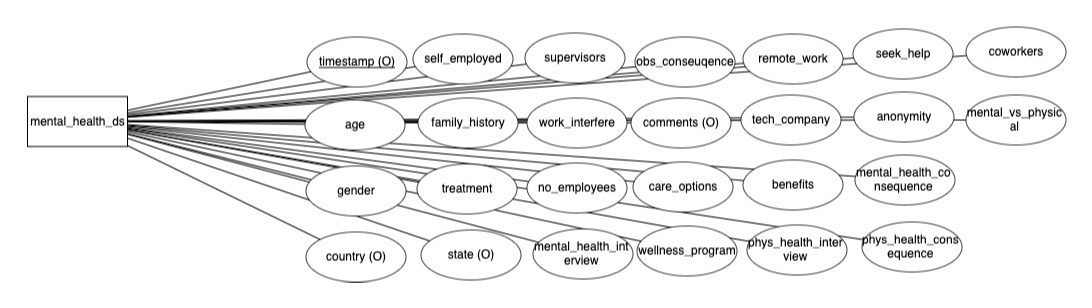

# **<span id="EDA" style="color:#023e8a;">Exploratory Data Analysis (EDA)</span>**

## Importing Libraries and Dataset

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from google.colab import drive
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
drive.mount('/content/gdrive', force_remount=True)

warnings.filterwarnings(action = 'ignore')

Mounted at /content/gdrive


In [ ]:
#Read the data
mental_health_df = pd.read_csv('/content/gdrive/Shareddrives/BA810-a1/mental-health-survey.csv')
mental_health_df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


## Check for Data Imbalance in Target Variable

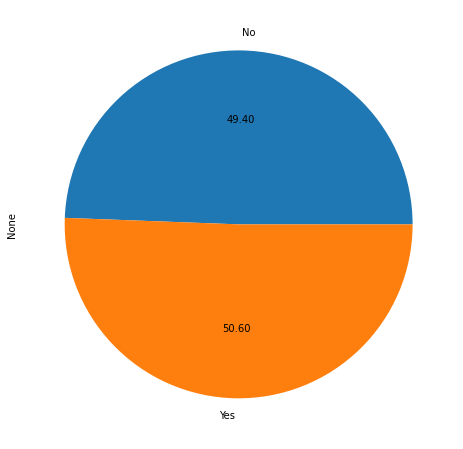

In [ ]:
mental_health_df.groupby('treatment').size().plot(kind='pie', autopct='%.2f',figsize=(10,8))
plt.show()

We observe that the target variable is balanced. 

## Basic Data Exploration

In [ ]:
#Dimensions of the data
mental_health_df.shape

(1259, 27)

In [ ]:
#Print the percentage of missing values in each column, sorted in descending order
print(mental_health_df.isnull().sum().sort_values(ascending=False)/mental_health_df.shape[0]*100)

comments                     86.973789
state                        40.905481
work_interfere               20.969023
self_employed                 1.429706
seek_help                     0.000000
obs_consequence               0.000000
mental_vs_physical            0.000000
phys_health_interview         0.000000
mental_health_interview       0.000000
supervisor                    0.000000
coworkers                     0.000000
phys_health_consequence       0.000000
mental_health_consequence     0.000000
leave                         0.000000
anonymity                     0.000000
Timestamp                     0.000000
wellness_program              0.000000
Age                           0.000000
benefits                      0.000000
tech_company                  0.000000
remote_work                   0.000000
no_employees                  0.000000
treatment                     0.000000
family_history                0.000000
Country                       0.000000
Gender                   

**Observations:**

The following columns have missing values:
* `comments` , 
*  `state`, 
*  `work_interfere`, 
*  `self_employed`

We chose to drop `comments` and `state` column because it is not relevant to our analysis. However, we will keep `work_interfere` and `self_employed` columns because we will use them in our analysis by filling the missing values with the most frequent value.

## Data Cleaning

### Replace Column Casing

In [ ]:
#For consistency, uppercase all column names
mental_health_df.columns = mental_health_df.columns.str.upper()
mental_health_df.columns

Index(['TIMESTAMP', 'AGE', 'GENDER', 'COUNTRY', 'STATE', 'SELF_EMPLOYED',
       'FAMILY_HISTORY', 'TREATMENT', 'WORK_INTERFERE', 'NO_EMPLOYEES',
       'REMOTE_WORK', 'TECH_COMPANY', 'BENEFITS', 'CARE_OPTIONS',
       'WELLNESS_PROGRAM', 'SEEK_HELP', 'ANONYMITY', 'LEAVE',
       'MENTAL_HEALTH_CONSEQUENCE', 'PHYS_HEALTH_CONSEQUENCE', 'COWORKERS',
       'SUPERVISOR', 'MENTAL_HEALTH_INTERVIEW', 'PHYS_HEALTH_INTERVIEW',
       'MENTAL_VS_PHYSICAL', 'OBS_CONSEQUENCE', 'COMMENTS'],
      dtype='object')

Fix `GENDER` Column

We see that the gender column seems to have some issues. We will fix this by replacing the values.

In [ ]:
#Fix Gender column
mental_health_df['GENDER'].replace(['Male ', 'male', 'M', 'm', 'Male','Make','msle', 'Cis Male','Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)','Cis Man', 'Malr', 'Mal', 'maile',], 'Male', inplace = True)
mental_health_df['GENDER'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female','femail', 'Cis Female','Female (cis)', 'cis-female/femme', 'Femake','woman',], 'Female', inplace = True)
mental_health_df["GENDER"].replace(['Female (trans)', 'queer/she/they', 'non-binary','fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous','Agender', 'A little about you', 'Nah', 'All','ostensibly male, unsure what that really means','Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?','Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)
mental_health_df['GENDER'].value_counts()

Male      991
Female    247
Other      21
Name: GENDER, dtype: int64

Fixing the `GENDER` column shows the possibility of how important it is to have clean input constraints at the data-collection step. The organization taking values as input could set a check-box, single-select box in the survey to ensure data consistency.

Fix `AGE` Column

As we can see, the `AGE` column has some issues. We will fix this by replacing the values.

In [ ]:
mental_health_df['AGE'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [ ]:
#Fix Age column
median_age=mental_health_df['AGE'].median()
value = mental_health_df['AGE']

outliers_high = value > 100
outliers_low= value < 18

mental_health_df['AGE'].mask(outliers_high, other=median_age, inplace=True)
mental_health_df['AGE'].mask(outliers_low, other=median_age, inplace=True)
mental_health_df['AGE'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

### Outlier Detection

In [ ]:
# Importing custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sb.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sb.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True


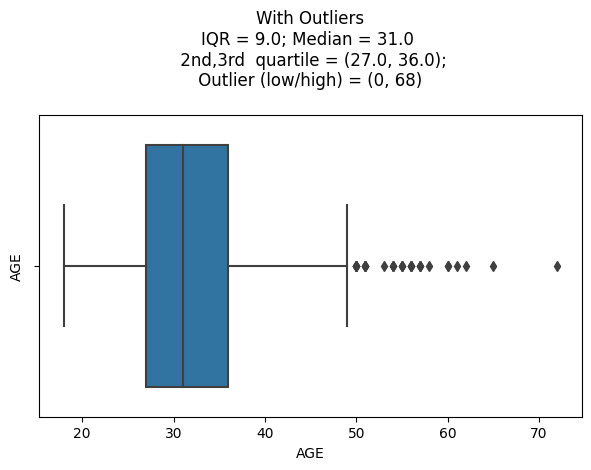

In [ ]:
#Find outliers for Age
Age=['AGE']
UVA_outlier(mental_health_df,Age)

**Observations:**

We see that the `AGE` column has some outliers. Median age is around **31 years old.**

**Dropping Columns**

In [ ]:
## Dropping Columns that are not needed for analysis
mental_health_df.drop(['TIMESTAMP','COUNTRY', 'STATE', 'COMMENTS'], axis=1, inplace=True)

### Convert Data Types Accordingly

Because we know all the columns except `age` is `category` we will convert them to `category` data type.

In [ ]:
#Convert all columns to categorical
mental_health_df = mental_health_df.astype('category')

#Convert AGE to numeric
mental_health_df['AGE'] = pd.to_numeric(mental_health_df['AGE'])
mental_health_df.dtypes

AGE                             int64
GENDER                       category
SELF_EMPLOYED                category
FAMILY_HISTORY               category
TREATMENT                    category
WORK_INTERFERE               category
NO_EMPLOYEES                 category
REMOTE_WORK                  category
TECH_COMPANY                 category
BENEFITS                     category
CARE_OPTIONS                 category
WELLNESS_PROGRAM             category
SEEK_HELP                    category
ANONYMITY                    category
LEAVE                        category
MENTAL_HEALTH_CONSEQUENCE    category
PHYS_HEALTH_CONSEQUENCE      category
COWORKERS                    category
SUPERVISOR                   category
MENTAL_HEALTH_INTERVIEW      category
PHYS_HEALTH_INTERVIEW        category
MENTAL_VS_PHYSICAL           category
OBS_CONSEQUENCE              category
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(mental_health_df, test_size = .25, random_state=0)

train_data.shape, test_data.shape

((944, 23), (315, 23))

In [ ]:
train_X = train_data.drop('TREATMENT',axis=1)
train_Y = train_data['TREATMENT']

# **<span id="Data-Preprocessing" style="color:#023e8a;">Data Preprocessing</span>**

In this section we create pipeline for preprocessing.
Since we have different models to test and few of them need imputation while others do not, we create seperate preprocess pipelines with and without imputation.

In [ ]:
set_config(display='diagram')
num_pipeline_with_imputation = make_pipeline(SimpleImputer(strategy="median"), 
                             StandardScaler())

cat_pipeline_with_imputation = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore", drop="first"))

cat_pipeline_without_imputation = make_pipeline(OneHotEncoder(handle_unknown="ignore", drop="first"))

In [ ]:
num_attribs = ['AGE']
cat_attribs = ['GENDER', 'SELF_EMPLOYED', 'FAMILY_HISTORY',
       'WORK_INTERFERE', 'NO_EMPLOYEES', 'REMOTE_WORK', 'TECH_COMPANY',
       'BENEFITS', 'CARE_OPTIONS', 'WELLNESS_PROGRAM', 'SEEK_HELP',
       'ANONYMITY', 'LEAVE', 'MENTAL_HEALTH_CONSEQUENCE',
       'PHYS_HEALTH_CONSEQUENCE', 'COWORKERS', 'SUPERVISOR',
       'MENTAL_HEALTH_INTERVIEW', 'PHYS_HEALTH_INTERVIEW',
       'MENTAL_VS_PHYSICAL', 'OBS_CONSEQUENCE']

In [ ]:
#pipeline with imputation
preprocessing_pipeline_with_impute = ColumnTransformer([    
    ("num", num_pipeline_with_imputation, num_attribs),
    ("cat", cat_pipeline_with_imputation, cat_attribs),
])

#pipeline without imputation
preprocessing_pipeline_without_impute = ColumnTransformer([
    ("cat", cat_pipeline_without_imputation, cat_attribs),
])


In [ ]:
preprocessing_pipeline_with_impute

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['GENDER', 'SELF_EMPLOYED', 'FAMILY_HISTORY',
                                  'WORK_INTERFERE', 'NO_EMPLOYEES',
                                  'REMOTE_WORK', 'TECH_COMPANY', 'BENEFITS',
                                  'CARE_OPTIONS', 'WELLNESS_PROGRAM',
                                  'SEEK_HELP', 'ANONYMITY', 'LEAVE',
                                  'MENTAL_HEALTH_CONSEQUENCE',
                                  'PHYS_HEALTH_CONSEQUENCE', 'COWORKERS',
                                  'SUPERVISOR', 'MENTAL_HEALTH_INTERVIEW',
                                  'PHYS_HEALTH_INTERVIEW', 'MENTAL_VS_PHYSICAL',
                                  'OBS_CONSEQUENCE'])])

We define a preprocessing pipeline without imputation since it is not required for random forest and xgboost.

In [ ]:
preprocessing_pipeline_without_impute

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['GENDER', 'SELF_EMPLOYED', 'FAMILY_HISTORY',
                                  'WORK_INTERFERE', 'NO_EMPLOYEES',
                                  'REMOTE_WORK', 'TECH_COMPANY', 'BENEFITS',
                                  'CARE_OPTIONS', 'WELLNESS_PROGRAM',
                                  'SEEK_HELP', 'ANONYMITY', 'LEAVE',
                                  'MENTAL_HEALTH_CONSEQUENCE',
                                  'PHYS_HEALTH_CONSEQUENCE', 'COWORKERS',
                                  'SUPERVISOR', 'MENTAL_HEALTH_INTERVIEW',
                                  'PHYS_HEALTH_INTERVIEW', 'MENTAL_VS_PHYSICAL',
                                  'OBS_CONSEQUENCE'])])

# **<span id="Feature-Selection" style="color:#023e8a;">Feature Selection</span>**

Next, we perform feature selection.
Since tree based models like random forest and xgboost use internal feature selection, we will mainly be using feature selection for linear models, like logistic regression and SVC.
Hence, we choose forward **sequential feature selector that uses a logistic regression**. (We've also attempted to run backward selection, but since our dataset was not that complex it was not giving us any improvement.)
So we decided to stick with forward as it is faster, giving us the same results.

In [ ]:
feature_selection_pipeline = Pipeline([
    ('prep', preprocessing_pipeline_with_impute),
    ('select', SequentialFeatureSelector(LogisticRegression(),n_features_to_select=1.0)),
])

#patching
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

We'll just fit the dataset to this pipeline that performs preprocessing and feature selection to understand what it returns.

In [ ]:
processed_X = feature_selection_pipeline.fit_transform(train_X, train_Y)

In [ ]:
#printing column names
feature_selection_pipeline.get_feature_names_out()

array(['num__AGE', 'cat__GENDER_Male', 'cat__GENDER_Other',
       'cat__SELF_EMPLOYED_Yes', 'cat__FAMILY_HISTORY_Yes',
       'cat__WORK_INTERFERE_Often', 'cat__WORK_INTERFERE_Rarely',
       'cat__WORK_INTERFERE_Sometimes', 'cat__NO_EMPLOYEES_100-500',
       'cat__NO_EMPLOYEES_26-100', 'cat__NO_EMPLOYEES_500-1000',
       'cat__NO_EMPLOYEES_6-25', 'cat__NO_EMPLOYEES_More than 1000',
       'cat__REMOTE_WORK_Yes', 'cat__TECH_COMPANY_Yes',
       'cat__BENEFITS_No', 'cat__BENEFITS_Yes',
       'cat__CARE_OPTIONS_Not sure', 'cat__CARE_OPTIONS_Yes',
       'cat__WELLNESS_PROGRAM_No', 'cat__WELLNESS_PROGRAM_Yes',
       'cat__SEEK_HELP_No', 'cat__SEEK_HELP_Yes', 'cat__ANONYMITY_No',
       'cat__ANONYMITY_Yes', 'cat__LEAVE_Somewhat difficult',
       'cat__LEAVE_Somewhat easy', 'cat__LEAVE_Very difficult',
       'cat__LEAVE_Very easy', 'cat__MENTAL_HEALTH_CONSEQUENCE_No',
       'cat__MENTAL_HEALTH_CONSEQUENCE_Yes',
       'cat__PHYS_HEALTH_CONSEQUENCE_No',
       'cat__PHYS_HEALTH_CONS

In [ ]:
#converting the output to a dataframe for easier representation
df_processed_X = pd.DataFrame(processed_X, 
                              columns = feature_selection_pipeline.get_feature_names_out(),
                              index = train_X.index)

In [ ]:
df_processed_X.head()

,num__AGE,cat__GENDER_Male,cat__GENDER_Other,cat__SELF_EMPLOYED_Yes,cat__FAMILY_HISTORY_Yes,cat__WORK_INTERFERE_Often,cat__WORK_INTERFERE_Rarely,cat__WORK_INTERFERE_Sometimes,cat__NO_EMPLOYEES_100-500,cat__NO_EMPLOYEES_26-100,...,cat__COWORKERS_Yes,cat__SUPERVISOR_Some of them,cat__SUPERVISOR_Yes,cat__MENTAL_HEALTH_INTERVIEW_No,cat__MENTAL_HEALTH_INTERVIEW_Yes,cat__PHYS_HEALTH_INTERVIEW_No,cat__PHYS_HEALTH_INTERVIEW_Yes,cat__MENTAL_VS_PHYSICAL_No,cat__MENTAL_VS_PHYSICAL_Yes,cat__OBS_CONSEQUENCE_Yes
783,0.135544,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
569,0.812547,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
601,0.406345,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1111,-0.406058,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
743,-0.135257,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **<span id="Machine-Learning-Models" style="color:#023e8a;">Machine Learning Models</span>**

Next and the most important step will be choosing a model.
As a first step we tried to choose a set of models we wanted to test.

Given that our data was highly categorical we wanted to test tree based models. Since decision trees have a problem with overfitting we decided to instead try random forest and boosting which overcome that issue a bit.

We also wanted to test linear models. So we decided to include logistic regression as well.SVC is another linear model and since it has a innate feature of being able to seperate classes properly we wanted to test that on our dataset as well.

So, Logistic Regression, SVC, Random Forest and XGBoost were the model we decided to test.

**What is our metric?**

Since the cost to the business is much higher for a false negative one of our main metrics is going to be a **custom cost matrix** that we will define. **False negatives will be weighed 5 times more costly than false positives**.

We also wanted to consider balanced accuracy and roc_auc metric to be sure the model is performing decently in those areas as well.

In [ ]:
#custom cost
def default_cost(y_true, y_pred): 
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * 5 + cm[0,1] * 1


scoring = {"AUC": "roc_auc",
           "balanced_accuracy": "balanced_accuracy", 
           "accuracy": "accuracy",
           "Cost": make_scorer(default_cost, greater_is_better=False)}

### Logistic Regression


In [ ]:
log_reg = make_pipeline(feature_selection_pipeline, LogisticRegression(C=1, penalty='l2', solver='lbfgs'))

scores = cross_validate(log_reg, train_X, train_Y,
                              scoring=scoring, cv=3)

print('Accuracy score is {:.2f}'.format(scores['test_accuracy'].mean()))
print('ROC_AUC score is {:.2f}'.format(scores['test_AUC'].mean()))
print('Balanced accuracy is {:.2f}'.format(scores['test_balanced_accuracy'].mean()))
print('Cost Score is {:.2f}'.format(-scores['test_Cost'].mean()))

Accuracy score is 0.76
ROC_AUC score is 0.82
Balanced accuracy is 0.76
Cost Score is 236.67


### SVC

In [ ]:
svc_pipeline = make_pipeline(feature_selection_pipeline, SVC())

scores = cross_validate(svc_pipeline, train_X, train_Y,
                              scoring=scoring, cv=3)

print('Accuracy score is {:.2f}'.format(scores['test_accuracy'].mean()))
print('ROC_AUC score is {:.2f}'.format(scores['test_AUC'].mean()))
print('Balanced accuracy is {:.2f}'.format(scores['test_balanced_accuracy'].mean()))
print('Cost Score is {:.2f}'.format(-scores['test_Cost'].mean()))

Accuracy score is 0.76
ROC_AUC score is 0.82
Balanced accuracy is 0.76
Cost Score is 237.00


### Random Forest

In [ ]:
cost_scorer = make_scorer(default_cost)


forest_pipeline = make_pipeline(preprocessing_pipeline_without_impute,
                             RandomForestClassifier(n_estimators=100, max_depth=8,min_samples_leaf=2, random_state=42))

scores = cross_validate(forest_pipeline, train_X, train_Y,
                              scoring=scoring, cv=3)

print('Accuracy score is {:.2f}'.format(scores['test_accuracy'].mean()))
print('ROC_AUC score is {:.2f}'.format(scores['test_AUC'].mean()))
print('Balanced accuracy is {:.2f}'.format(scores['test_balanced_accuracy'].mean()))
print('Cost Score is {:.2f}'.format(-scores['test_Cost'].mean()))

Accuracy score is 0.82
ROC_AUC score is 0.89
Balanced accuracy is 0.82
Cost Score is 111.33


### XGBoost

In [ ]:
xgb_pipeline = make_pipeline(preprocessing_pipeline_without_impute,
                              XGBClassifier(n_estimators=100, max_depth=6,learning_rate=0.1, random_state=42))

scores = cross_validate(xgb_pipeline, train_X, train_Y,
                              scoring=scoring, cv=3)

print('Accuracy score is {:.2f}'.format(scores['test_accuracy'].mean()))
print('ROC_AUC score is {:.2f}'.format(scores['test_AUC'].mean()))
print('Balanced accuracy is {:.2f}'.format(scores['test_balanced_accuracy'].mean()))
print('Cost Score is {:.2f}'.format(-scores['test_Cost'].mean()))

Accuracy score is 0.83
ROC_AUC score is 0.89
Balanced accuracy is 0.83
Cost Score is 131.67


So Random Forest and XGBoost are close contenders when we consider metrics like balanced accuracy and roc_auc score. But since our main metric is our cost as we need to reduce false negatives we can see that random forest works better in that. So Random Forest would be the best performing model for our dataset and metrics.

Now we test a voting classifier of all the 4 models and see if it gives us improvement on this:

### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('svc', svc_pipeline),
        ('rfc', forest_pipeline),
        ('xgb',xgb_pipeline)
    ]
    # default is hard voting, but you can use soft voting by passing voting = 'soft'
)

y_pred = cross_val_predict(voting_clf, train_X, train_Y, cv=3)

print('Balanced Accuracy score is {:.2f}'.format(balanced_accuracy_score(train_Y,y_pred)))
print('Accuracy score is {:.2f}'.format(accuracy_score(train_Y,y_pred)))
print('Cost Score is  {}'.format(default_cost(train_Y,y_pred)/3))
#dividing cost by 3(because k=3) to keep it at par with previous model cost scores which give us a mean cost across 3 folds. 

Balanced Accuracy score is 0.82
Accuracy score is 0.82
Cost Score is  206.0


### Conclusion Model Selection



| Model               | Accuracy Score | Balanced Accuracy | ROC_AUC Score | Custom Cost Score (Less is better) |
|---------------------|----------------|-------------------|---------------|------------------------------------|
| Logistic Regression | 0.76           | 0.76              | 0.82          | 236.67                             |
| SVC                 | 0.76           | 0.76              | 0.82          | 237.00                             |
| **Random Forest**   | 0.82           | 0.82              | 0.89          | **111.33**                         |
| XGBoost             | 0.83           | 0.83              | 0.89          | 131.67                             |
| Voting Classifier   | 0.82           | 0.82              | NA            | 206.0                              |

Note that we could not print roc_auc because it needs more information that just y_pred. It needs probabilities which our cross_val_predict is not returning. So we use the other available metrics to compare.

Balanced accuracy has not improved much and using our custom score metric random forest works much better. So we go ahead and use random forest model as it gave us the best results so far.

# **<span id="Hyperparameter-Tuning" style="color:#023e8a;">Hyperparameter Tuning</span>**

Using the same custom cost matrix we have defined above, we choose the best hyper-parameters for our random forest model.

In [ ]:
forest_pipeline = Pipeline([
                        ('preprocess', preprocessing_pipeline_without_impute),
                        ("random_forest", RandomForestClassifier(n_estimators=100, random_state=42)),
                       ])

There are four main hyper-parameters for random forest that we would test:
* n_estimators
* max_depth
* min_samples_leaf. 
* max_features

We chose randomized search because it explores the range much better. (We also tried grid search to compare the results but we could see that randomized search was giving us significantly better results for the same number of iterations as expected so we decided to stick with it.)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


param_distribs = {'random_forest__max_features': randint(low=2, high=20),
                  'random_forest__n_estimators': randint(low=10, high=100),
                  'random_forest__max_depth': randint(low=2, high=10), 
                  'random_forest__min_samples_leaf': randint(low=2, high=10), }

rnd_search = RandomizedSearchCV(
    forest_pipeline, param_distributions=param_distribs, n_iter=50, cv=3,
    scoring=make_scorer(default_cost, greater_is_better=False), random_state=42)

rnd_search.fit(train_X, train_Y)

print(("Best balanced accuracy score: {:.2f}").format(-rnd_search.best_score_))
print(("Best parameters: {}").format(rnd_search.best_params_))

Best balanced accuracy score: 88.00
Best parameters: {'random_forest__max_depth': 2, 'random_forest__max_features': 4, 'random_forest__min_samples_leaf': 6, 'random_forest__n_estimators': 60}


We use these best parameters we've obtained from randomized search.
* 'max_depth': 2, 
* 'max_features': 4, 
* 'min_samples_leaf': 6, 
* 'n_estimators': 60

In [ ]:
# printing the rest of the top 5 performing values
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,0.096323,0.001396,0.018089,0.001430,2,4,6,60,"{'random_forest__max_depth': 2, 'random_forest...",-117.0,-63.0,-84.0,-88.000000,22.226111,1
41,0.121430,0.002867,0.018055,0.001785,8,14,8,52,"{'random_forest__max_depth': 8, 'random_forest...",-114.0,-80.0,-93.0,-95.666667,14.007934,2
46,0.195029,0.001527,0.025367,0.002962,7,12,9,98,"{'random_forest__max_depth': 7, 'random_forest...",-110.0,-81.0,-101.0,-97.333333,12.119773,3
27,0.130970,0.002507,0.025474,0.005018,5,9,9,72,"{'random_forest__max_depth': 5, 'random_forest...",-114.0,-94.0,-84.0,-97.333333,12.472191,3
9,0.164405,0.002065,0.019202,0.000113,9,16,7,71,"{'random_forest__max_depth': 9, 'random_forest...",-119.0,-86.0,-89.0,-98.000000,14.899664,5


# **<span id="Performance Metrics" style="color:#023e8a;">Performance Metrics</span>**

So far we have used cross validation to make decisions on models and parameters. We use the model and hyperparameters we have chosen in our previous steps and test its performance across various metrics in this section.

For that we're going to fit our training data to the chosen model and predict on our test dataset we kept aside in the beginning to get an estimate of our model performance.



In [49]:
#REdefining the pipeline with the best hyperparameters chosen

forest_pipeline = Pipeline([
                        ('preprocess', preprocessing_pipeline_without_impute),
                        ("random_forest", RandomForestClassifier(n_estimators=60, random_state=42, max_features=4, max_depth=2, min_samples_leaf=4)),
                       ])

In [50]:
forest_pipeline.fit(train_X,train_Y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['GENDER', 'SELF_EMPLOYED',
                                                   'FAMILY_HISTORY',
                                                   'WORK_INTERFERE',
                                                   'NO_EMPLOYEES',
                                                   'REMOTE_WORK',
                                                   'TECH_COMPANY', 'BENEFITS',
                                                   'CARE_OPTIONS',
                                                   'WELLNESS_PROGRAM',
                                                   'SEEK_HELP', 'ANONYMITY',
                                                   'LEAVE',
                                                   'MENTAL_HEALTH_CONSEQUENCE',
                                                   'PHYS_HEALTH_CONSEQUENCE',
                                                   'COWORKERS', 'SUPERVISOR',
                                                   'MENTAL_HEALTH_INTERVIEW',
                                                   'PHYS_HEALTH_INTERVIEW',
                                                   'MENTAL_VS_PHYSICAL',
                                                   'OBS_CONSEQUENCE'])])),
                ('random_forest',
                 RandomForestClassifier(max_depth=2, max_features=4,
                                        min_samples_leaf=4, n_estimators=60,
                                        random_state=42))])

In [51]:
y_pred = forest_pipeline.predict(test_data.drop(['TREATMENT'],axis=1))

One thing to note before we check the metrics is that our main goals was to optimize the number of false negatives. But we will also look at the other metrics.

### Confusion Matrix


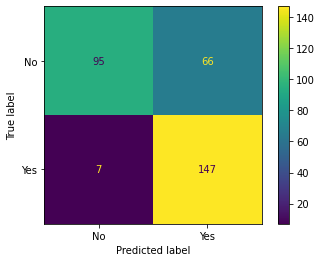

In [52]:
import matplotlib
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_data['TREATMENT'],y_pred);

We can see that the false negatives are very low as expected.

### Custom Cost Function

In [56]:
print('The cost under standard prediction strategy is %d.' % default_cost(test_data['TREATMENT'],y_pred))

The cost under standard prediction strategy is 101.


### Classification Report



In [53]:
from sklearn.metrics import classification_report

print(classification_report(test_data['TREATMENT'],y_pred))

              precision    recall  f1-score   support

          No       0.93      0.59      0.72       161
         Yes       0.69      0.95      0.80       154

    accuracy                           0.77       315
   macro avg       0.81      0.77      0.76       315
weighted avg       0.81      0.77      0.76       315



### Balanced Accuracy

In [54]:
from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(test_data['TREATMENT'],y_pred))

0.7723037831733484


In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_data['TREATMENT'],y_pred))

0.7682539682539683


### ROC Curve

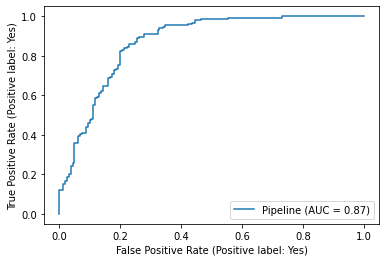

In [57]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(forest_pipeline, test_data.drop(['TREATMENT'],axis=1), test_data['TREATMENT']);

# **<span id="Observations" style="color:#023e8a;">Overall Observations</span>**

## Feature Importances

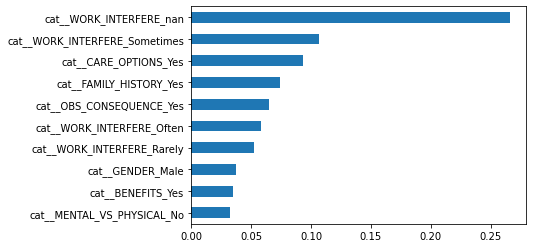

In [60]:
forest_pipeline[1].feature_importances_

(pd.Series(forest_pipeline[1].feature_importances_, index=forest_pipeline[0].get_feature_names_out())
   .nlargest(10)
   .sort_values()
   .plot(kind='barh'))  

We can observe that the important features for our model are:
* `WORK INTEFERE`
* `FAMILY HISTORY`
* `CARE OPTIONS`
* `GENDER`

## General observations about various models


* Randomized search gave us much better results that grid search for the same number of iterations.
* Since we worked with survey data which had quite some data missing and there's no easy way to impute it, models that can work around null values worked better for us.
* Although we had assume smart models like xgboost will perform much better, we saw that random forest was working better for our metric. 



## Challenges faced

* We had a lot of categorical data to deal with. So we had to check quite a few encoding methods.
* Since we wanted to make sure our false negatives were low we had to check models on a different metric.
* We had to spend time on determing the cost to business for FN and FP.

# **<span id="Conclusion" style="color:#023e8a;">Conclusion</span>**

While conciously trying not to make any inferences or suggestions on how to improve,  we can safely say that organizations should concentrate on how much work interferes, family history of illnesses and care options given as they display high importance in our model.

# **<span id="References" style="color:#023e8a;">References</span>**